<a href="https://colab.research.google.com/github/Emyfoton/Codigos_pregrado/blob/main/Arqu%C3%ADmedes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pint
!pip install pint uncertainties
import uncertainties
from uncertainties import ufloat
import pint as pint
ureg=pint.UnitRegistry(auto_reduce_dimensions=True)
Measurement=ureg.Measurement
Quantity=ureg.Quantity

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 3.2 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import uncertainties.unumpy as unp
from scipy.optimize import curve_fit

# **1) Volúmenes Medidos**

In [ ]:
b_Laton = ufloat(1.980, 0.005) * ureg.cm
p_Laton = ufloat(1.980, 0.005) * ureg.cm
h_Laton = ufloat(1.895, 0.005) * ureg.cm

Volumen_Laton = b_Laton * p_Laton * h_Laton

b_Fe = ufloat(1.975, 0.005) * ureg.cm
p_Fe = ufloat(1.975, 0.005) * ureg.cm
h_Fe = ufloat(1.940, 0.005) * ureg.cm

Volumen_Fe = b_Fe * p_Fe * h_Fe

f'{Volumen_Laton:.3f}', f'{Volumen_Fe:.3f}'

('7.429+/-0.033 centimeter ** 3', '7.567+/-0.033 centimeter ** 3')

# **2) Volúmenes Sumergidos**

In [ ]:
RhoA = Quantity(1, 'g/cm^3')
g = Quantity(9.771, 'm/s^2')


T0_Laton = ufloat(0.586, 0.003) * ureg.N
T_Laton = ufloat(0.515, 0.003) * ureg.N

Vs_Laton = (T0_Laton - T_Laton) / (RhoA*g)
Vs_Laton = Vs_Laton.to('cm^3')

T0_Fe = ufloat(0.581, 0.003) * ureg.N
T_Fe = ufloat(0.506, 0.003) * ureg.N

Vs_Fe = (T0_Fe - T_Fe) / (RhoA*g)
Vs_Fe = Vs_Fe.to('cm^3')

f'{Vs_Fe:.3f}', f'{Vs_Laton:.3f}'

('7.676+/-0.434 centimeter ** 3', '7.266+/-0.434 centimeter ** 3')

# **3) Fuerzas vs volumen Aluminio**

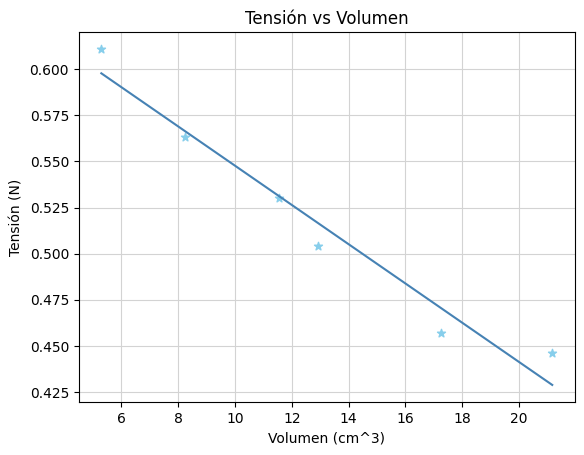

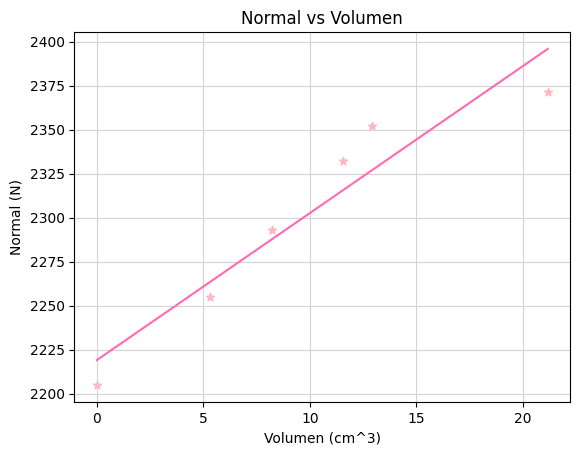

In [5]:


b_Aluminio = 1.980
a_Aluminio = 1.980
A_Aluminio = b_Aluminio * a_Aluminio
Al_sumergido1= np.array([ 1.350, 2.100, 2.950, 3.300, 4.400, 5.400])
Al_sumergido2= np.array([ 0.00, 1.350, 2.100, 2.950, 3.300,  5.400])

V_Al1=  A_Aluminio * Al_sumergido1
V_Al2=  A_Aluminio * Al_sumergido2


#Tensión
T_Al=  np.array([0.611, 0.563, 0.530, 0.504, 0.457, 0.446])


def ajuste (m, x, b):
  return m*x + b

popt, pocv= curve_fit(ajuste, V_Al1, T_Al)
m= popt[0]
b= popt[1]

plt.scatter(V_Al1, T_Al, marker= "*", c= "skyblue")
plt.plot(V_Al1, ajuste(m, V_Al1, b), c= "steelblue")
plt.title('Tensión vs Volumen')
plt.xlabel('Volumen (cm^3)')
plt.ylabel('Tensión (N)')
plt.grid(c="lightgrey")
plt.show()

#Normal
m_Al= np.array([225.00, 230.07, 234.00, 238.00, 240.02, 242.00])
N_Al= m_Al*9.8

popt1, pocv1= curve_fit(ajuste, V_Al2, N_Al)
m1= popt1[0]
b1= popt1[1]

plt.scatter(V_Al2, N_Al, marker= "*", c= "lightpink")
plt.plot(V_Al2, ajuste(m1, V_Al2, b1), c= "hotpink")
plt.title('Normal vs Volumen')
plt.xlabel('Volumen (cm^3)')
plt.ylabel('Normal (N)')
plt.grid(c="lightgrey")

In [7]:
print(f'Pendiente Tensión:', m)
print(f'Pendiente Normal:', m1)

Pendiente Tensión: -0.010642506051467004
Pendiente Normal: 8.353023999974395


In [13]:
from logging import error
phof_tension= -m/9.8
phof_normal= m1/9.8

error= np.diag(pocv)
error1= np.diag(pocv1)

print(f'Densidad por Tensión:', phof_tension, "+-", error[0])
print(f'Densidad por Normal:', phof_normal, "+-", error1[0])

Densidad por Tensión: 0.001085970005251735 +- 1.2172582477285674e-06
Densidad por Normal: 0.8523493877524893 +- 1.723035008683012


# 6) Cálculo de M

In [ ]:


b_Aluminio = ufloat(1.980, 0.005) * ureg.cm
p_Aluminio = ufloat(1.980, 0.005) * ureg.cm
h_Aluminio = ufloat(5.07, 0.005) * ureg.cm

A_Aluminio = b_Aluminio*p_Aluminio

h_s = unp.uarray([1.350, 2.100, 2.950, 3.300, 4.400, 5.400], 0.005) * ureg.cm
h_s = h_s.to('m')

balanza = unp.uarray([230.07, 234.00, 238.33, 240.02, 242.00, 245.51], 0.01) * ureg.g
balanza = balanza.to_base_units()

N_balanza = balanza*g
N_balanza = N_balanza.to('N')

M = (N_balanza - RhoA*A_Aluminio*h_s*g)/g
M = M.to('g')

import numpy as np

M, np.mean(M)

(<Quantity([224.77746000000002+/-0.029008358347207452
  225.76715999999996+/-0.03672446873679727
  226.76482000000007+/-0.046798530468381165 227.08268+/-0.05117515221276826
  224.75024+/-0.06541548443602631 224.33984+/-0.07874123191822693], 'gram')>,
 <Quantity(225.580+/-0.046, 'gram')>)

In [ ]:
V_Al = b_Aluminio * h_Aluminio * p_Aluminio
f'{V_Al:.3f}'


'19.876+/-0.074 centimeter ** 3'